## Load and plot Templeton ephys data

In [4]:
#Import packages
import pandas as pd
import h5py
import numpy as np
import scipy as sp
import scipy.signal as sg
import xarray as xr
import os
import matplotlib.pyplot as plt
from matplotlib import patches
import ast

from DR_analysis_utils import Session, makePSTH, make_neuron_time_trials_tensor

%matplotlib notebook

In [93]:
#Set paths to experiment folders
main_path = [
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-07-26_14-09-36_620263\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-07-27_13-57-17_620263\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-08-02_15-40-19_620264\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-09-19_13-48-26_628801\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-09-26_12-48-09_636397\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-09-27_11-37-08_636397\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-12-05_13-08-02_644547\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-12-06_12-35-35_644547\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2023-01-17_11-39-17_646318\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2023-01-18_10-44-55_646318\processed",
    
]

### Load/initialize data from one session

In [94]:
sel_session=9
session=Session(path=main_path[sel_session]) 

In [95]:
# trials table
session.trials

,Unnamed: 0,trialStartFrame,trialStimID,trialstimRewarded,trial_response,trial_rewarded,trial_sound_dur,trial_vis_stim_dur,vis_go_trials,vis_nogo_trials,...,catch_resp_trials,trialStimStartFrame,trialGalvoVoltage_x,trialGalvoVoltage_y,trialOptoDur,trialOptoOnsetFrame,trialOptoVoltage,stimStartTime,stimLatency,trial_stim_dur
0,0,0,sound1,sound1,True,True,0.75,0.0,False,False,...,False,212,NaN,NaN,NaN,NaN,NaN,100.047854,0.036104,0.75
1,1,393,sound1,sound1,True,True,0.75,0.0,False,False,...,False,494,NaN,NaN,NaN,NaN,NaN,104.777844,0.062104,0.75
2,2,675,sound1,sound1,True,True,1.00,0.0,False,False,...,False,771,NaN,NaN,NaN,NaN,NaN,109.407798,0.071208,1.00
3,3,952,sound1,sound1,True,True,0.50,0.0,False,False,...,False,1059,NaN,NaN,NaN,NaN,NaN,114.207768,0.067437,0.50
4,4,1240,sound1,sound1,True,True,0.75,0.0,False,False,...,False,1418,NaN,NaN,NaN,NaN,NaN,120.187697,0.058687,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,666,214310,sound2,sound1,False,False,0.75,0.0,False,False,...,False,214414,NaN,NaN,NaN,NaN,NaN,3686.954217,0.063917,0.75
667,667,214595,vis1,sound1,False,False,0.00,0.5,True,False,...,False,214744,NaN,NaN,NaN,NaN,NaN,3692.450865,0.022635,0.50
668,668,214925,vis2,sound1,False,False,0.00,0.5,False,True,...,False,215034,NaN,NaN,NaN,NaN,NaN,3697.305070,0.022380,0.50
669,669,215215,vis1,sound1,False,False,0.00,1.0,True,False,...,False,215349,NaN,NaN,NaN,NaN,NaN,3702.592350,0.022380,1.00


In [96]:
# units table
session.units

,quality,peak_channel,waveform_duration,probe,amplitude,index,cluster_id,firing_rate,presence_ratio,isi_viol,amplitude_cutoff,isolation_distance,l_ratio,d_prime,nn_hit_rate,nn_miss_rate,silhouette_score,max_drift,cumulative_drift,epoch_name
id,,,,,,,,,,,,,,,,,,,,
2301181010000,mua,4,0.233333,A,2.604083,0,0,0.683165,0.68,2.625078,0.032992,36.177355,0.117868,4.159836,0.903382,0.000738,-0.020354,43.87,114.02,complete_session
2301181010001,mua,0,0.233333,A,4.761179,1,1,1.692182,0.70,2.728252,0.031396,20.704183,0.260406,2.595838,0.967199,0.000416,0.081595,65.64,111.45,complete_session
2301181010002,good,0,0.233333,A,2.707706,2,2,0.003269,0.12,0.000000,0.016174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,complete_session
2301181010003,mua,2,0.266666,A,2.698619,3,3,0.027171,0.37,0.000000,0.500000,48.025110,0.001682,4.927310,0.666667,0.000033,NaN,60.72,0.00,complete_session
2301181010004,mua,1,0.299999,A,5.448950,4,4,10.790290,0.99,0.461043,0.001778,80.847519,0.003421,3.482134,0.986000,0.005618,0.081595,42.22,129.66,complete_session
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301181060612,mua,58,0.566665,F,3.271030,592,612,0.075794,0.65,0.000000,0.032717,23.582339,1.309261,4.937376,0.486111,0.000668,NaN,6.25,16.49,complete_session
2301181060613,mua,130,0.666665,F,2.793378,593,613,0.077837,0.82,0.000000,0.257592,16.921209,4.733794,4.751382,0.270833,0.001102,NaN,8.73,7.88,complete_session
2301181060614,mua,183,0.266666,F,2.367601,594,614,0.024311,0.22,0.000000,0.347169,18.158919,2.715129,5.683195,0.000000,0.000033,NaN,8.32,8.32,complete_session


In [97]:
# spike times from one unit
session.spike_times[session.units.index[0]]

array([ 462.96153116,  564.60896021,  576.8416276 , ..., 4906.57981946,
       4906.74491902, 4907.20055114])

In [98]:
# information about each frame
session.frames

,Unnamed: 0,vsyncTimes,frameDelay,runningSpeed
0,0,96.47572,0.020780,0.000000
1,1,96.49238,0.020780,2.589973
2,2,96.50910,0.022505,3.669129
3,3,96.52573,0.022505,4.532453
4,4,96.54251,0.022460,5.395777
...,...,...,...,...
215995,215995,3713.39575,0.022445,3.453298
215996,215996,3713.41228,0.022360,3.884960
215997,215997,3713.42934,0.022360,3.669129
215998,215998,3713.44607,0.022100,3.884960


### Create a convenient data array using "xarray"

In [99]:
# loop through sessions and make unit xarrays
time_before_flash = 0.5
trial_duration = 2
bin_size = 0.001


# Make tensor (3-D matrix [units,time,trials])
trial_tensor = make_neuron_time_trials_tensor(session.good_units, session.spike_times, 
                                              session.trials,time_before_flash, trial_duration, 
                                              bin_size)

# make xarray
session.trial_da = xr.DataArray(trial_tensor, dims=("unit_id", "time", "trials"), 
                           coords={
                               "unit_id": session.good_units.index.values,
                               "time": np.arange(0, trial_duration, bin_size)-time_before_flash,
                               "trials": session.trials.index.values
                               })

### Plot unit density across probes

<IPython.core.display.Javascript object>


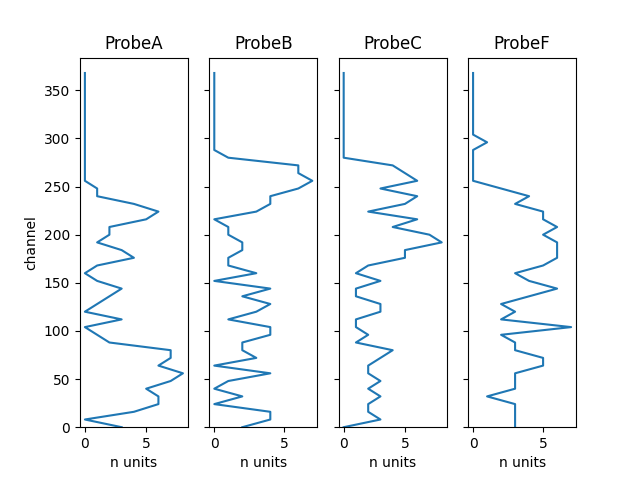

In [100]:
probes = session.good_units['probe'].unique()
ch_bins=np.arange(0,384,8)

units_by_channel = session.good_units[['probe','peak_channel']].value_counts()

fig,ax=plt.subplots(1,len(probes))

for ip,pr in enumerate(probes):
    unit_hist,edges=np.histogram(units_by_channel[pr].sort_index().index,bins=ch_bins)
    ax[ip].plot(unit_hist,ch_bins[:-1])
    ax[ip].set_ylim([0,384])
    ax[ip].set_xlabel('n units')
    ax[ip].set_title('Probe'+pr)
    if ip>0:
        ax[ip].set_yticklabels([])
    else:
        ax[ip].set_ylabel('channel')
        

### Plot rasters -- sorted by stimulus duration

<IPython.core.display.Javascript object>


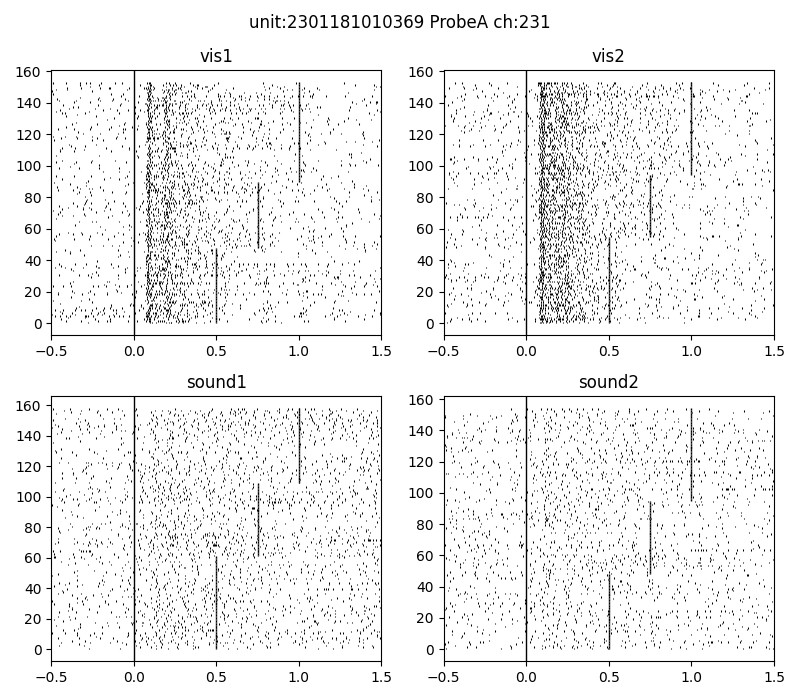

In [101]:
#Plot rasters: sort by stimulus duration

#select unit either by its location in the unit table or its ID    
unit_id=session.good_units.index[145]
# unit_id=10121

fig,ax=plt.subplots(2,2,figsize=(8,7))
ax=ax.flatten()
stim_types=['vis1','vis2','sound1','sound2']

color_options = ['green','blue','red','orange']

trial_color_map = {}
for ii,ss in enumerate(stim_types):
    trial_color_map[ss]=color_options[ii]


for si,ss in enumerate(stim_types):
    stim_trials = session.trials[session.trials['trialStimID']==ss]
    stim_trials_sorted = stim_trials.sort_values(by='trial_stim_dur',axis=0,ascending=True)
    
    sel_trials = session.trial_da.sel(trials=stim_trials_sorted.index.values)
    
    #find the ilocs of block transitions
    sel_trials_table = session.trials.loc[stim_trials.index.values]
    column_changes = sel_trials_table['trialstimRewarded'].shift() != sel_trials_table['trialstimRewarded']
    block_changes = sel_trials_table[column_changes]
    
    for it,tt in enumerate(sel_trials.trials.values):
        trial_spikes = sel_trials.sel(unit_id=unit_id,trials=tt)
        trial_color=[]

        trial_color = trial_color_map[session.trials['trialStimID'][tt]]

        trial_spike_times = trial_spikes.time[trial_spikes.values.astype('bool')]
        ax[si].vlines(trial_spike_times,ymin=it,ymax=it+1,linewidth=0.75,color='k')
        
        ax[si].vlines(stim_trials_sorted['trial_stim_dur'].loc[tt],ymin=it-.01,ymax=it+1.01,linewidth=1,color='k')

    if len(block_changes)>1:
        if block_changes.iloc[0]['trialstimRewarded']=='vis1':
            start_block=1
        elif block_changes.iloc[0]['trialstimRewarded']=='sound1':
            start_block=0

        for xx in np.asarray([0,2,4])+start_block:
            start_iloc=sel_trials_table.index.get_loc(block_changes.index[xx])
            if (xx+1)>(len(block_changes)-1):
                end_iloc=len(sel_trials_table)
            else:
                end_iloc=sel_trials_table.index.get_loc(block_changes.index[xx+1])
            temp_patch=patches.Rectangle([-0.5,start_iloc],1.5,end_iloc-start_iloc,
                                        color=[0.5,0.5,0.5],alpha=0.15)
            ax[si].add_patch(temp_patch)
        
    ax[si].set_xlim([-0.5,1.5])

    ax[si].axvline(0,color='k',linewidth=1)

    ax[si].set_title(ss)

fig.suptitle('unit:'+str(unit_id)+' Probe'+session.good_units['probe'].loc[unit_id]+
             ' ch:'+str(session.good_units['peak_channel'].loc[unit_id]))

fig.tight_layout()



### Plot heatmaps

In [102]:
#Average & normalize responses of each unit to each stimulus

#find baseline mean and std per unit
baseline_mean_per_trial=session.trial_da.sel(time=slice(-0.5,-0.4)).mean(dim=["time"])
baseline_mean=baseline_mean_per_trial.mean(dim="trials").values
baseline_std=baseline_mean_per_trial.std(dim="trials").values

#find unique stimuli
stimuli = np.unique(session.trials['trialStimID'])

#remove catch trials for this plot
stimuli = stimuli[stimuli!='catch']

#pre-allocate array for average
unit_frs_by_stim = np.zeros((len(session.trial_da.unit_id),len(session.trial_da.time),len(stimuli)))

#normalize each unit's avg FRs to its baseline  FR
for ss,stim in enumerate(stimuli):
    stim_trials = (session.trials.query('trialStimID==@stim')).index.values
    unit_frs_by_stim[:,:,ss] = session.trial_da.sel(trials=stim_trials).mean(dim="trials").values
    
    # z-score each unit rel to its baseline
    unit_frs_by_stim[:,:,ss] = ((unit_frs_by_stim[:,:,ss].T- baseline_mean.T)/baseline_std.T).T


In [103]:
#Find/define probe borders for plotting

probe_borders=np.where(session.good_units['probe'].iloc[:-1].values!=session.good_units['probe'].iloc[1:].values)[0]
all_edges=np.hstack([0,probe_borders,len(session.good_units)])
midpoints=all_edges[:-1]+(all_edges[1:]-all_edges[:-1])/2
probe_labels=session.good_units['probe'].iloc[midpoints.astype('int')].values

<IPython.core.display.Javascript object>


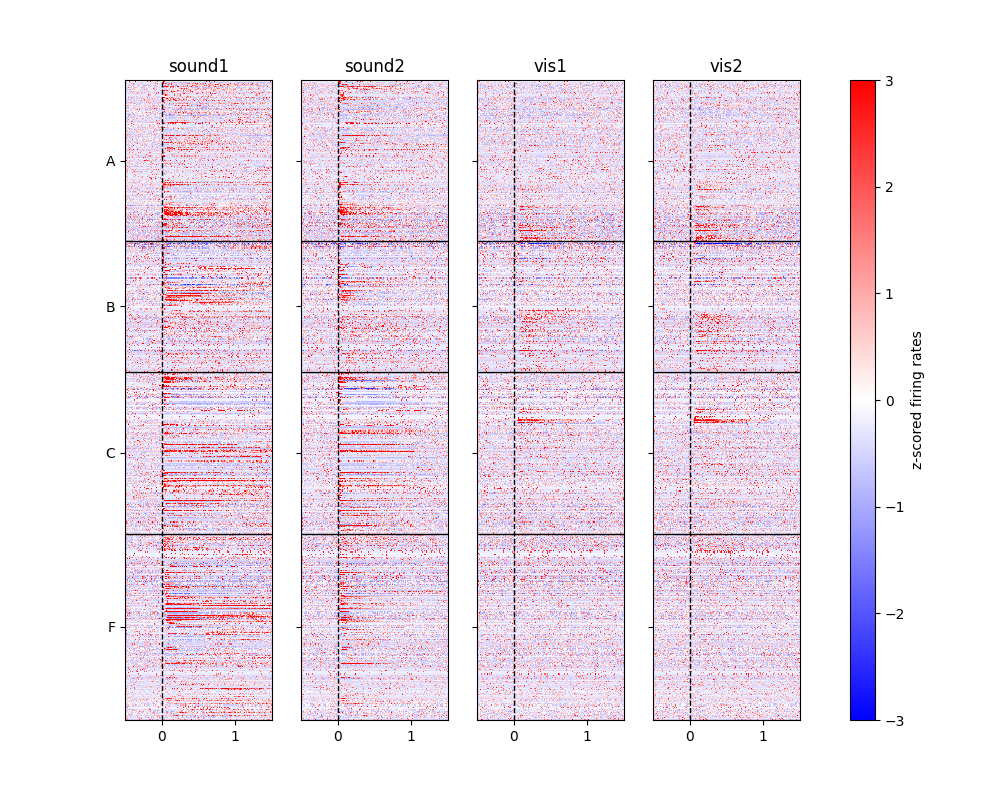

Text(0, 0.5, 'z-scored firing rates')

In [104]:
# plot heatmaps
# ordered by ascending channel number - top is tip of probe

fig,ax=plt.subplots(1,4,figsize=(10,8))
for xx in range(0,len(stimuli)): 
    im = ax[xx].imshow(unit_frs_by_stim[:,:,xx],aspect='auto',vmin=-3,vmax=3,
                   cmap=plt.get_cmap('bwr'),interpolation='none',
                   extent=(-time_before_flash,trial_duration-time_before_flash,
                           0,unit_frs_by_stim.shape[0]))
    
    ax[xx].axvline(0,color='k',linestyle='--',linewidth=1)
    ax[xx].set_title(stimuli[xx])
    ax[xx].set_xlim(-0.5,1.5)
    ax[xx].hlines(unit_frs_by_stim.shape[0]-probe_borders,xmin=-0.5,xmax=1.5,
                   color='k',linewidth=1)
    ax[xx].set_yticks(unit_frs_by_stim.shape[0]-midpoints)
    ax[xx].set_yticklabels(probe_labels)
    if xx>0:
        ax[xx].set_yticklabels([])

# this adjusts the other plots to make space for the colorbar
fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.3) 
cax = plt.axes([0.85, 0.1, 0.025, 0.8])
cbar = fig.colorbar(im, cax=cax)
cbar.ax.set_ylabel('z-scored firing rates')


### Plot PSTH according to probe and channel range

In [105]:
# choose channel range and probe

channel_range=[100,300]
sel_probe='B'

stimuli = np.unique(session.trials['trialStimID'])

stim_PSTHs = {}


sel_units = session.good_units.query('probe == @sel_probe and \
                                           peak_channel >= @channel_range[0] and \
                                           peak_channel < @channel_range[1]')
for stim in stimuli:

    stim_trials = session.trials.query('trialStimID == @stim').index

    stim_PSTHs[stim]=[]
    stim_PSTHs[stim].append(session.trial_da.sel(
                            unit_id=sel_units.index,
                            trials=stim_trials).mean(dim=['trials']))


In [106]:
# smooth each unit's PSTH
gwindow = sg.gaussian(50, std=25)
stim_PSTH_smooth={}
for stim in stimuli:
    stim_PSTH_smooth[stim]=np.zeros(stim_PSTHs[stim][0].shape)

    for iu,uu in enumerate(stim_PSTHs[stim][0].unit_id.values):
        stim_PSTH_smooth[stim][iu,:]=sg.convolve(stim_PSTHs[stim][0].sel(unit_id=uu),
                                                 gwindow,mode='same')/np.sum(gwindow)


<IPython.core.display.Javascript object>


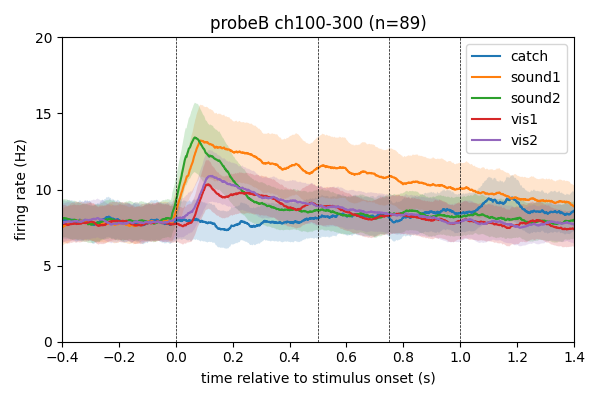

In [107]:
fig,ax=plt.subplots(1,1,figsize=(6,4))

for stim in stimuli:

    y=np.nanmean(stim_PSTH_smooth[stim],0)
    err=np.nanstd(stim_PSTH_smooth[stim],0)/np.sqrt(stim_PSTH_smooth[stim].shape[0])
    linex=ax.plot(stim_PSTHs[stim][0].time, y)
    plt.fill_between(stim_PSTHs[stim][0].time, y-err, y+err,
        alpha=0.2, edgecolor=None, facecolor=linex[0].get_color())


ax.set_title('probe'+sel_probe+' ch'+str(channel_range[0])+'-'+
             str(channel_range[1])+' (n='+str(len(stim_PSTHs[stim][0].unit_id))+')')
ax.set_xlabel('time relative to stimulus onset (s)')
ax.set_ylabel('firing rate (Hz)')
ax.set_xlim([-0.4,1.4])

ax.set_yticks([0,5,10,15,20])
ax.legend(stimuli)

stim_lines=[0,0.5,0.75,1]
for sl in stim_lines:
    ax.axvline(sl,color='k',linestyle='--',linewidth=0.5)

fig.tight_layout()

### Bin by trials - do responses change over the course of the session?

In [108]:
# choose channel range and probe

trial_bin_size = 40


channel_range=[0,100]
sel_probe='F'

stim = 'vis2'

stim_PSTHs = {}

sel_units = session.good_units.query('probe == @sel_probe and \
                                           peak_channel >= @channel_range[0] and \
                                           peak_channel < @channel_range[1]')

stim_trials = session.trials.query('trialStimID == @stim').index

trial_bins = np.arange(0,len(stim_trials),trial_bin_size)

mean_stim_PSTH = session.trial_da.sel(unit_id=sel_units.index,
                                      trials=stim_trials).mean(dim=['trials'])

trial_bin_PSTH = np.zeros((mean_stim_PSTH.shape[0],
                           mean_stim_PSTH.shape[1],
                           np.ceil(len(stim_trials)/trial_bin_size).astype(int)))

for it,tt in enumerate(trial_bins):

    trial_bin_PSTH[:,:,it]=session.trial_da.sel(unit_id=sel_units.index,
                                                trials=stim_trials[tt:tt+trial_bin_size]).mean(dim=['trials'])

# smooth each unit's PSTH
gwindow = sg.gaussian(50, std=25)
trial_bin_PSTH_smooth=np.zeros((trial_bin_PSTH.shape))

for it in range(0,trial_bin_PSTH.shape[2]):
    for iu in range(0,trial_bin_PSTH.shape[0]):
        trial_bin_PSTH_smooth[iu,:,it]=sg.convolve(trial_bin_PSTH[iu,:,it],gwindow,mode='same')/np.sum(gwindow)


<IPython.core.display.Javascript object>


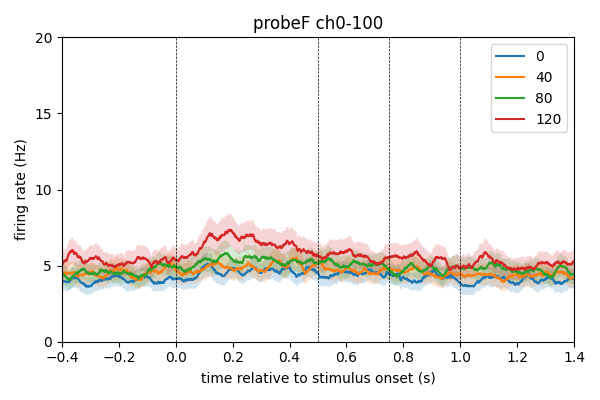

In [109]:
fig,ax=plt.subplots(1,1,figsize=(6,4))

for it in range(0,trial_bin_PSTH.shape[2]):
    
    y=np.nanmean(trial_bin_PSTH_smooth[:,:,it],0)
    err=np.nanstd(trial_bin_PSTH_smooth[:,:,it],0)/np.sqrt(trial_bin_PSTH_smooth[:,:,it].shape[0])
    linex=ax.plot(mean_stim_PSTH[0].time, y)
    plt.fill_between(mean_stim_PSTH[0].time, y-err, y+err,
        alpha=0.2, edgecolor=None, facecolor=linex[0].get_color())


ax.set_title('probe'+sel_probe+' ch'+str(channel_range[0])+'-'+
             str(channel_range[1]))
ax.set_xlabel('time relative to stimulus onset (s)')
ax.set_ylabel('firing rate (Hz)')
ax.set_xlim([-0.4,1.4])

ax.set_yticks([0,5,10,15,20])
ax.legend(trial_bins)

stim_lines=[0,0.5,0.75,1]
for sl in stim_lines:
    ax.axvline(sl,color='k',linestyle='--',linewidth=0.5)

fig.tight_layout()